## Kevin Mittal, 12/12/19
## ISE 364 Project

# import all revelant packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import the data from data.csv, basic exploration and cleaning

In [2]:
df = pd.read_csv('data.csv', names=["Ref", "A", "Ser", "B", "Num3", "C", "D", "E", "F", "G", "Num4", "Num5", "Num6", "H", "Size"])

In [3]:
df.head()

,Ref,A,Ser,B,Num3,C,D,E,F,G,Num4,Num5,Num6,H,Size
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Ref     32561 non-null int64
A       32561 non-null object
Ser     32561 non-null int64
B       32561 non-null object
Num3    32561 non-null int64
C       32561 non-null object
D       32561 non-null object
E       32561 non-null object
F       32561 non-null object
G       32561 non-null object
Num4    32561 non-null int64
Num5    32561 non-null int64
Num6    32561 non-null int64
H       32561 non-null object
Size    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,Ref,Ser,Num3,Num4,Num5,Num6
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


change size column to 0,1 for later analysis and prediction

In [6]:
df['Size'] = df['Size'].map({'LARGE': 1, 'SMALL': 0})
df['G'] = df['G'].map({'G0':0, 'G1':1})
df['E'] = df['E'].map({'E0':0, 'E1':1, 'E2':2, 'E3':3, 'E4':4, 'E5':5})

In [7]:
df.head()

,Ref,A,Ser,B,Num3,C,D,E,F,G,Num4,Num5,Num6,H,Size
0,39,A0,77516,B0,13,C0,D0,0,F0,0,2174,0,40,H0,0
1,50,A1,83311,B0,13,C1,D1,1,F0,0,0,0,13,H0,0
2,38,A2,215646,B1,9,C2,D2,0,F0,0,0,0,40,H0,0
3,53,A2,234721,B2,7,C1,D2,1,F1,0,0,0,40,H0,0
4,28,A2,338409,B0,13,C1,D3,2,F1,1,0,0,40,H1,0


In [8]:
df['F'] = df['F'].str[1:]
df['D'] = df['D'].str[1:]
df['C'] = df['C'].str[1:]
df['B'] = df['B'].str[1:]
df['A'] = df['A'].str[1:]
df['H'] = df['H'].str[1:]

In [9]:
df.head()

,Ref,A,Ser,B,Num3,C,D,E,F,G,Num4,Num5,Num6,H,Size
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [10]:
df['A'] = pd.to_numeric(df['A'])
df['B'] = pd.to_numeric(df['B'])
df['C'] = pd.to_numeric(df['C'])
df['D'] = pd.to_numeric(df['D'])
df['F'] = pd.to_numeric(df['F'])
df['H'] = pd.to_numeric(df['H'])

In [11]:
df = df.dropna()

In [12]:
np.where(np.isnan(df))

(array([], dtype=int64), array([], dtype=int64))

In [13]:
df.describe()

,Ref,A,Ser,B,Num3,C,D,E,F,G,Num4,Num5,Num6,H,Size
count,30162.000000,30162.000000,3.016200e+04,30162.00000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.145415,1.897938e+05,3.37282,10.121312,1.075061,4.287879,1.523971,0.211823,0.324315,1092.007858,88.372489,40.931238,1.245839,0.248922
std,13.134665,1.057390,1.056530e+05,3.41833,2.549995,1.217557,3.102449,1.431980,0.612461,0.468126,7406.346497,404.298370,11.979984,5.100457,0.432396
min,17.000000,0.000000,1.376900e+04,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,1.00000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,2.00000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,5.00000,13.000000,1.000000,6.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.00000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


# Do a basic pairplot 

//miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


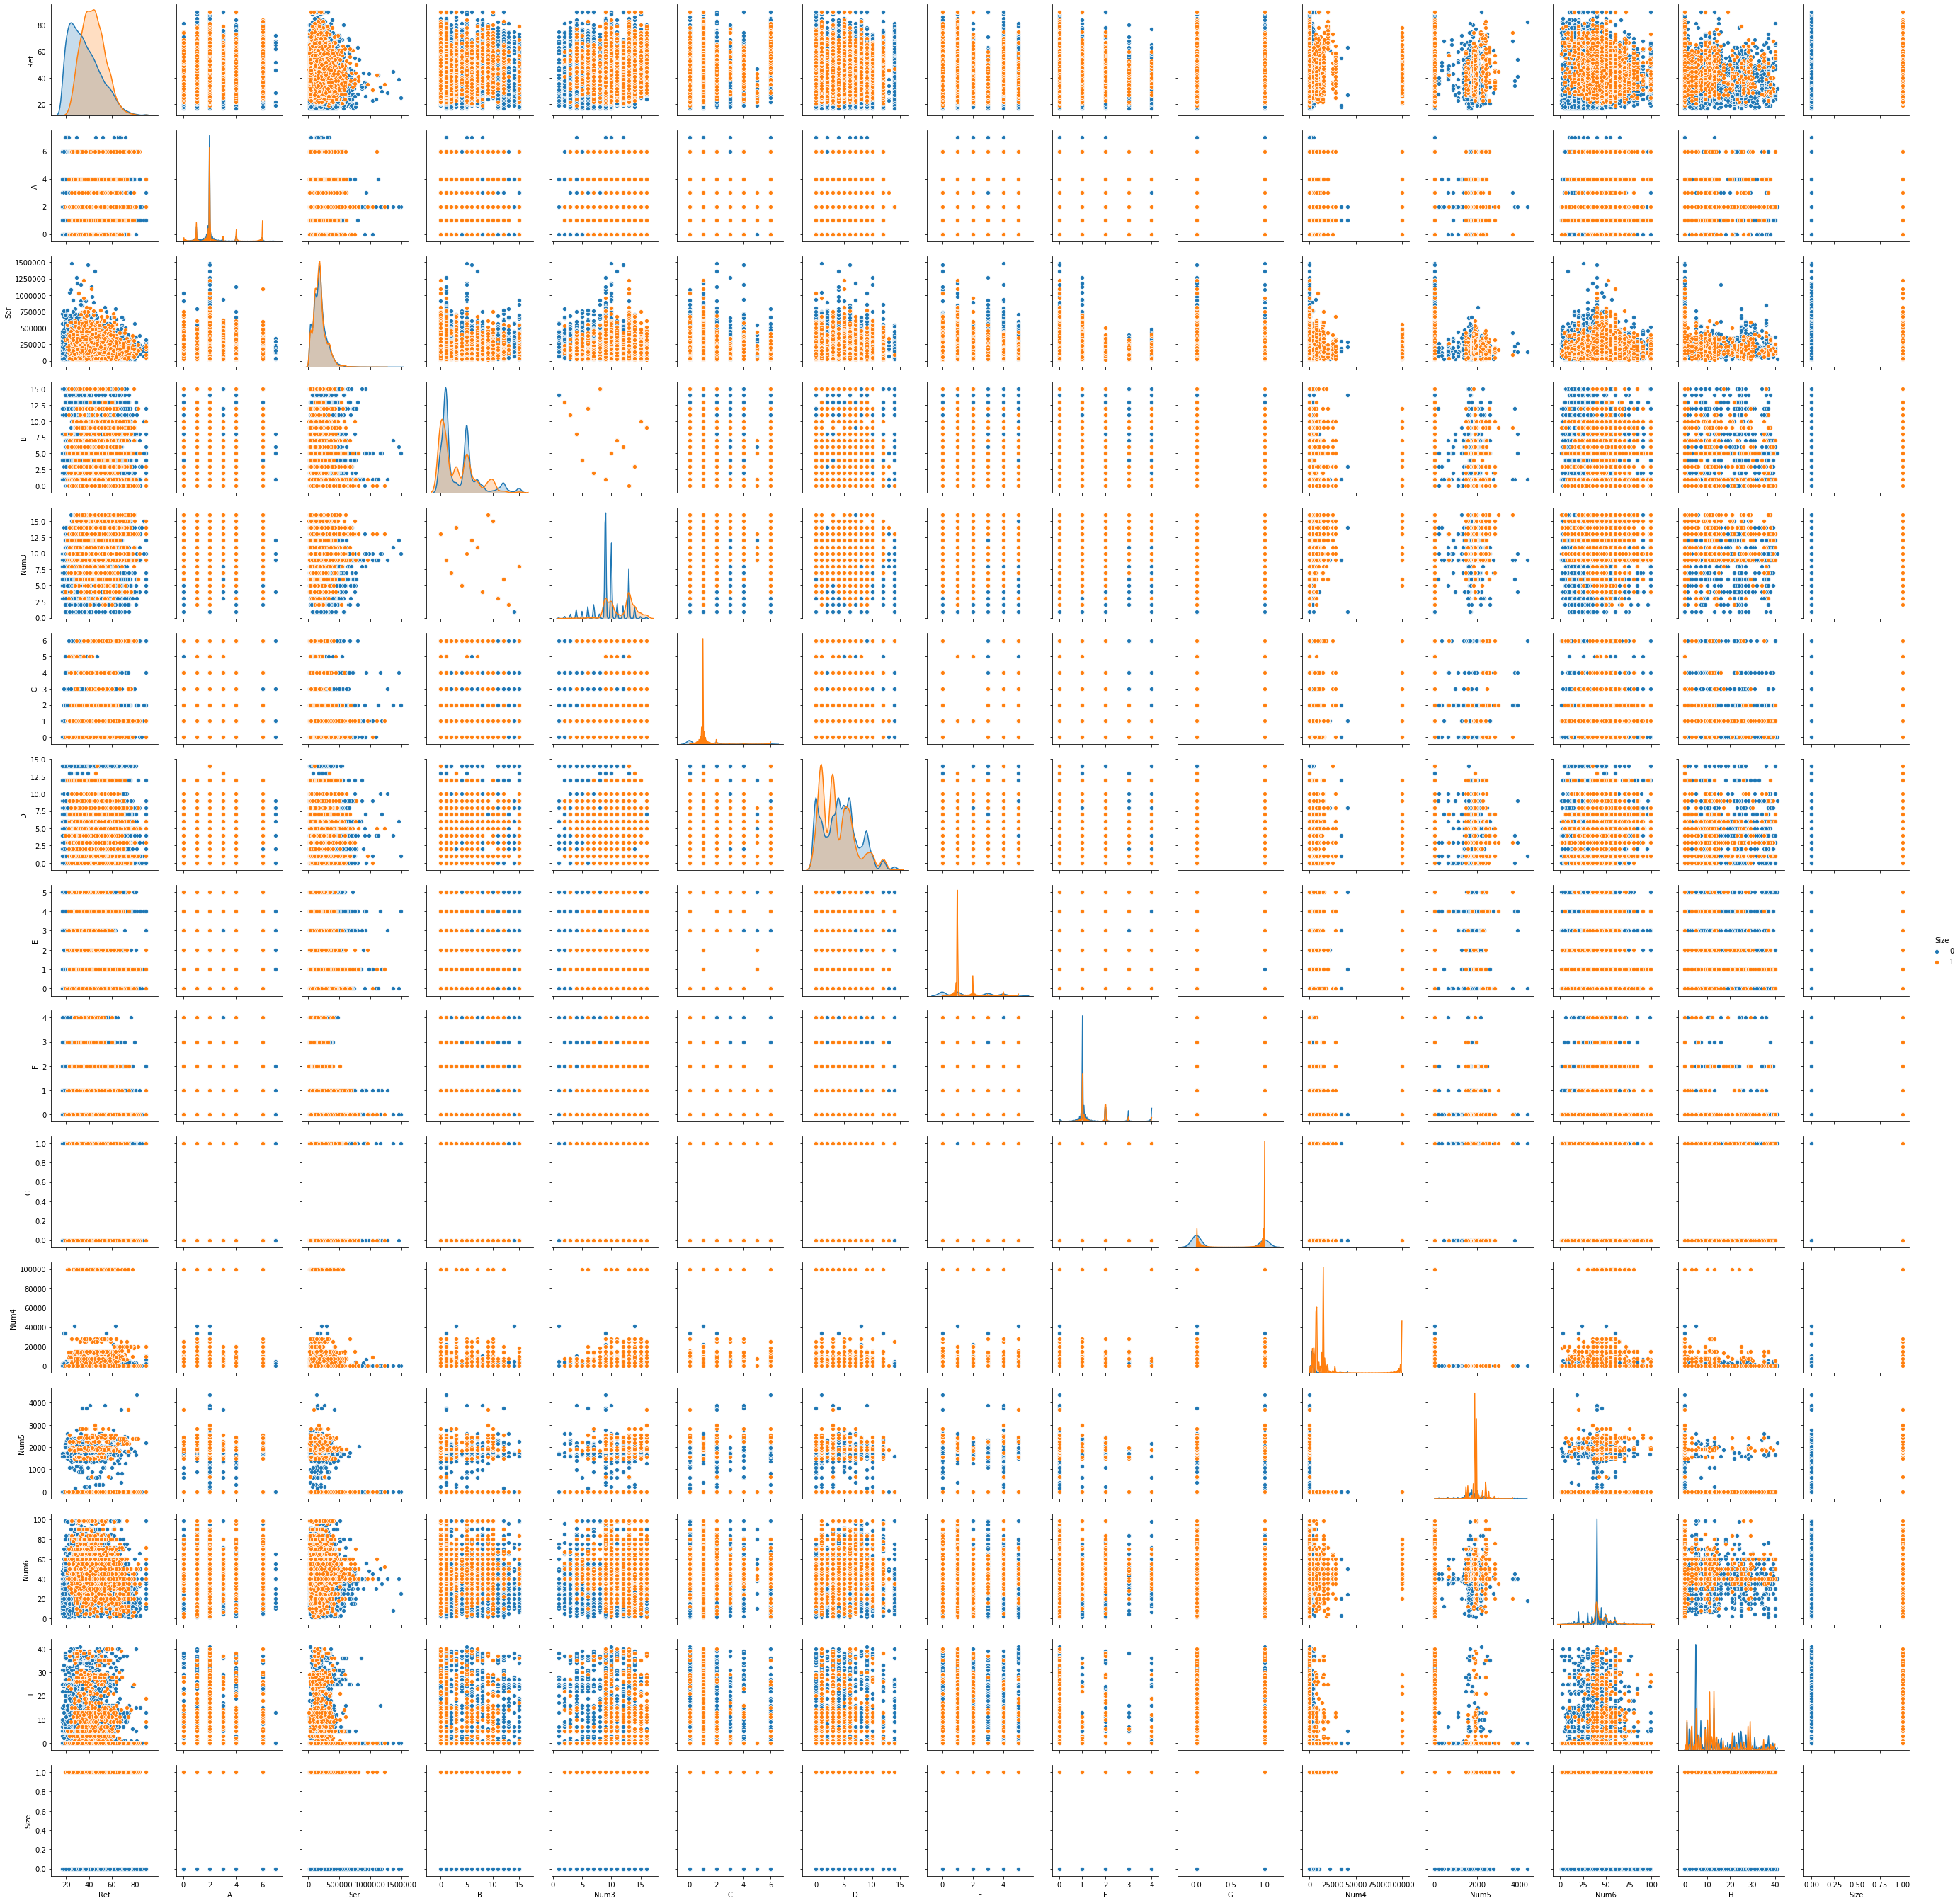

In [14]:
sns.pairplot(df, hue='Size')

# Train Test Split

split data into training and test set with sklearn

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Size', axis=1)
y = df['Size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

 # Using KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
myKNN = KNeighborsClassifier(n_neighbors = 1)

In [20]:
myKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [21]:
y_predict = myKNN.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(confusion_matrix(y_test,y_predict))

[[5410 1333]
 [1245 1061]]


In [24]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      6743
           1       0.44      0.46      0.45      2306

    accuracy                           0.72      9049
   macro avg       0.63      0.63      0.63      9049
weighted avg       0.72      0.72      0.72      9049



# Decision Tree Classifier


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
y_predict = dtree.predict(X_test)

In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6743
           1       0.61      0.62      0.62      2306

    accuracy                           0.80      9049
   macro avg       0.74      0.74      0.74      9049
weighted avg       0.80      0.80      0.80      9049



# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rforest = RandomForestClassifier(n_estimators = 300)

In [32]:
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_predict = rforest.predict(X_test)

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6743
           1       0.75      0.64      0.69      2306

    accuracy                           0.85      9049
   macro avg       0.82      0.78      0.80      9049
weighted avg       0.85      0.85      0.85      9049



# Use model on futures.csv

In [35]:
future = pd.read_csv('futures.csv', names=["Ref", "A", "Ser", "B", "Num3", "C", "D", "E", "F", "G", "Num4", "Num5", "Num6", "H"])

In [36]:
future['G'] = future['G'].map({'G0':0, 'G1':1})
future['E'] = future['E'].map({'E0':0, 'E1':1, 'E2':2, 'E3':3, 'E4':4, 'E5':5})

In [37]:
future['F'] = future['F'].str[1:]
future['D'] = future['D'].str[1:]
future['C'] = future['C'].str[1:]
future['B'] = future['B'].str[1:]
future['A'] = future['A'].str[1:]
future['H'] = future['H'].str[1:]

In [38]:
future['A'] = pd.to_numeric(future['A'])
future['B'] = pd.to_numeric(future['B'])
future['C'] = pd.to_numeric(future['C'])
future['D'] = pd.to_numeric(future['D'])
future['F'] = pd.to_numeric(future['F'])
future['H'] = pd.to_numeric(future['H'])

In [39]:
future.head()

,Ref,A,Ser,B,Num3,C,D,E,F,G,Num4,Num5,Num6,H
0,38,0.0,89814,1,9,1,1.0,1,1,0,0,0,50,0.0
1,28,1.0,336951,2,12,1,2.0,1,1,0,0,0,40,0.0
2,44,0.0,160323,3,10,1,0.0,1,0,0,7688,0,40,0.0
3,18,NaN,103497,3,10,0,NaN,0,1,1,0,0,30,0.0
4,63,3.0,104626,5,15,1,5.0,1,1,0,3103,0,32,0.0


In [40]:
future = future.dropna()

In [41]:
predictions = rforest.predict(future)

In [42]:
print(predictions)

[0 0 1 ... 0 0 1]


In [43]:
p1 = pd.DataFrame(predictions)

In [44]:
p1.head()

,0
0,0
1,0
2,1
3,1
4,1


In [45]:
final = pd.read_csv('futures.csv', names=["Ref", "A", "Ser", "B", "Num3", "C", "D", "E", "F", "G", "Num4", "Num5", "Num6", "H"])

In [46]:
final['Size'] = p1

In [47]:
final.head()

,Ref,A,Ser,B,Num3,C,D,E,F,G,Num4,Num5,Num6,H,Size
0,38,A0,89814,B1,9,C1,D1,E1,F1,G0,0,0,50,H0,0.0
1,28,A1,336951,B2,12,C1,D2,E1,F1,G0,0,0,40,H0,0.0
2,44,A0,160323,B3,10,C1,D0,E1,F0,G0,7688,0,40,H0,1.0
3,18,?,103497,B3,10,C0,?,E0,F1,G1,0,0,30,H0,1.0
4,63,A3,104626,B5,15,C1,D5,E1,F1,G0,3103,0,32,H0,1.0


In [48]:
final['Size'] = final['Size'].map({1.0: 'LARGE', 0.0: 'SMALL'})

In [49]:
final.head()

,Ref,A,Ser,B,Num3,C,D,E,F,G,Num4,Num5,Num6,H,Size
0,38,A0,89814,B1,9,C1,D1,E1,F1,G0,0,0,50,H0,SMALL
1,28,A1,336951,B2,12,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
2,44,A0,160323,B3,10,C1,D0,E1,F0,G0,7688,0,40,H0,LARGE
3,18,?,103497,B3,10,C0,?,E0,F1,G1,0,0,30,H0,LARGE
4,63,A3,104626,B5,15,C1,D5,E1,F1,G0,3103,0,32,H0,LARGE


In [50]:
final.to_csv('final.csv', index=False, header=False)

In [51]:
ff = pd.read_csv('final.csv')

In [52]:
ff.head()

,38,A0,89814,B1,9,C1,D1,E1,F1,G0,0,0.1,50,H0,SMALL
0,28,A1,336951,B2,12,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
1,44,A0,160323,B3,10,C1,D0,E1,F0,G0,7688,0,40,H0,LARGE
2,18,?,103497,B3,10,C0,?,E0,F1,G1,0,0,30,H0,LARGE
3,63,A3,104626,B5,15,C1,D5,E1,F1,G0,3103,0,32,H0,LARGE
4,65,A0,184454,B1,9,C1,D0,E1,F1,G0,6418,0,40,H0,SMALL
